<a href="https://colab.research.google.com/github/prakhar281005/Python-Projects/blob/main/PCA_dimensionality_reduction_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal components analysis (PCA) algorithm


In [1]:
import numpy as np

np.random.seed(1)

In [2]:
# 100D uniform distribution 
X1 = np.random.random((10000, 100)) # 10000 samples, 100 dimensions

# 2D normal distribution 
X2 = np.random.multivariate_normal(np.array([-1, 5]), np.array([[1, 2], [2, 8]]), size=20) # 20 samples, 2 dimensions

# 3D normal distribution 
X3 = np.random.multivariate_normal(np.array([7, 3, 5]), np.array([[1, 2, 0], [2, 0.5, 0.7], [0, 0.7, 0.1]]), size=1000) # 1000 samples, 3 dimensions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


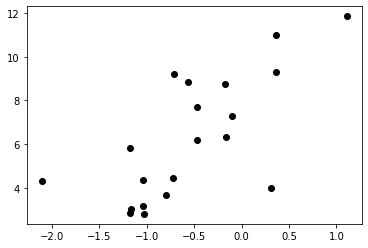

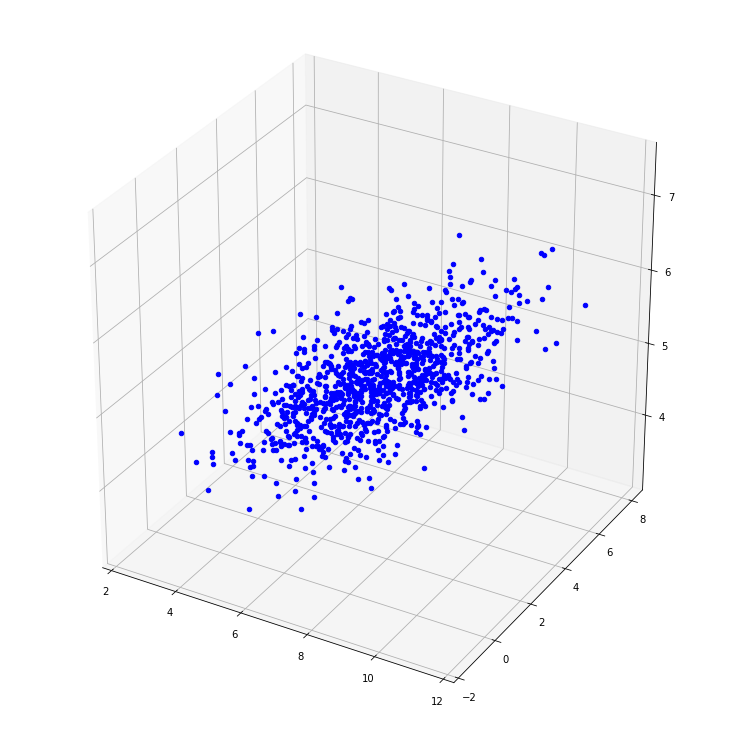

In [3]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for x,y in X2:
  plt.scatter(x,y, color = "black")
plt.xlabel ="x1"
plt.ylabel ="x2"
plt.show()

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for a,b,c in X3:
  ax.scatter(a,b,c, color = "blue")
ax.xlabel ="x1"






[[ 0.77536103 -1.06710912]
 [-1.77106741  0.29848393]
 [-1.88244158  0.49223014]
 ...
 [ 0.87804833  0.14809717]
 [-0.83343009 -0.06153827]
 [ 0.2100025   0.14204174]]


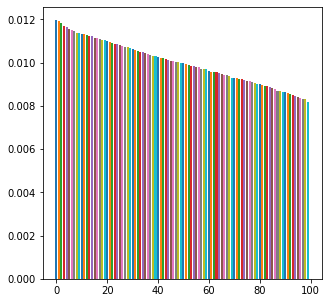

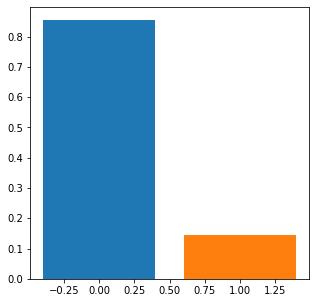

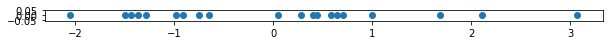

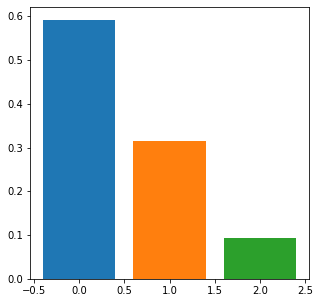

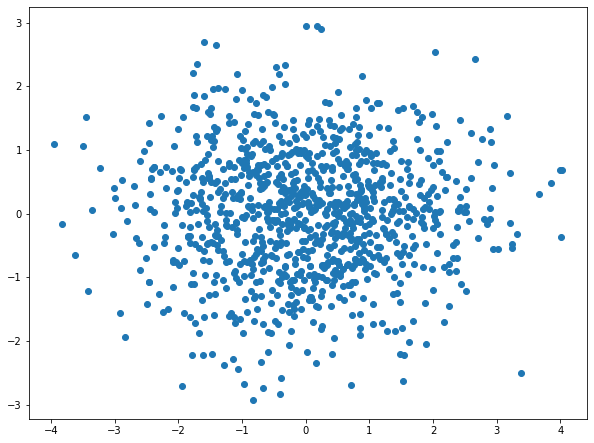

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
def myPCA(X,d):
  scaler = StandardScaler()
  X_std = scaler.fit_transform(X)
  pca = PCA(n_components=d)
  pca.fit(X_std)
  fig = plt.figure(figsize=(5,5))
  

  for i in range(d):
    fig = plt.bar(i,pca.explained_variance_ratio_[i])

  pca_dirs = pca.components_ 
  pca2 = pca.fit_transform(X_std)
  pca_dirs_t = pca.transform(pca_dirs)
  
  if d<=3:
    fig1 = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_aspect("equal")
  
# The 3 dimesion data set can be reduced to 2D and 2D can be reduced to 1 D without significant change in data arrangement relative to each other
#1D scatter plot after dimension reduction

    if d == 2:
      model1pca = PCA(1)
      model1pca.fit(X_std)
      pc_X_std = model1pca.fit_transform(X_std)
      #print(pc_X_std) 
      fig1 = plt.scatter(pc_X_std[:,0],np.zeros(len(pc_X_std)))

#2 D scatter plot after dimension reductiion
    if d == 3:
      model2pca = PCA(2)
      model2pca.fit(X_std)
      pc_X_std = model2pca.fit_transform(X_std)
      print(pc_X_std) 
      fig1 = plt.scatter(pc_X_std[:,0],pc_X_std[:,1])

#fig2 = plt.figure(figsize=(5,5))
#fig2 = plt.scatter(X2[:,0],np.zeros(len(X2)))

myPCA(X1,100)
myPCA(X2,2)
myPCA(X3,3)



# Finding structure in breast cancer data


In [7]:

from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()

breast_features = breast.feature_names  # names of each column in our dataset
breast_labels   = breast.target         # 0 if tumor is benign, 1 if tumor is malignant
breast_data     = breast.data           # dataset matrix



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

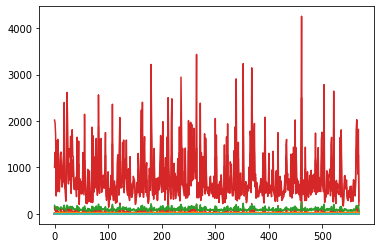

In [8]:

print(breast_features)
print(breast_labels)
print(breast_data)
plt.plot(breast_data)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std_breast = scaler.fit_transform(breast_data)


[[ 9.1928368   1.94858405 -1.12317298]
 [ 2.3878018  -3.76817201 -0.52929137]
 [ 5.7338963  -1.07517454 -0.55174197]
 ...
 [ 1.25617929 -1.90229733  0.56273467]
 [10.37479403  1.67201108 -1.87703552]
 [-5.47524327 -0.67063803  1.49045177]]


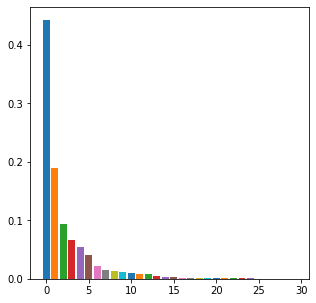

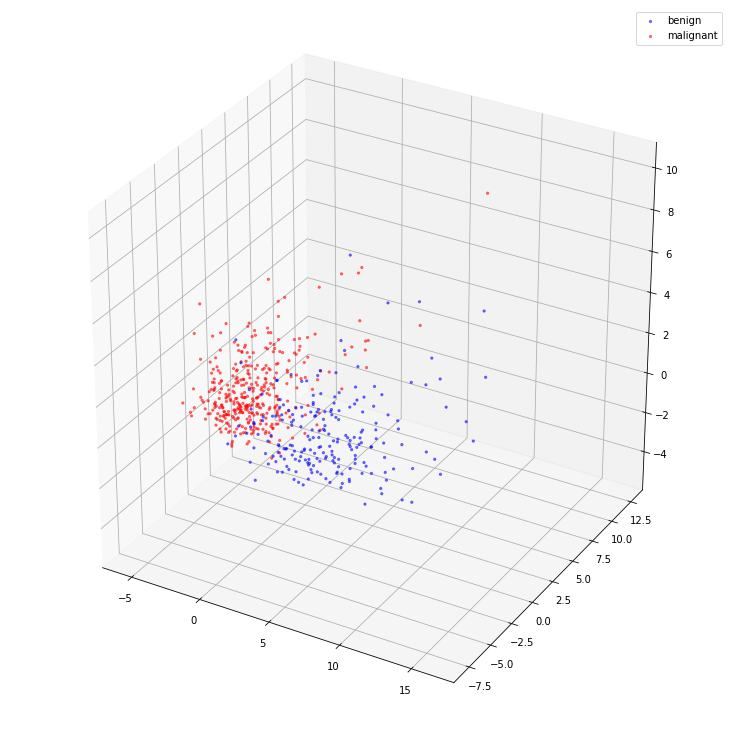